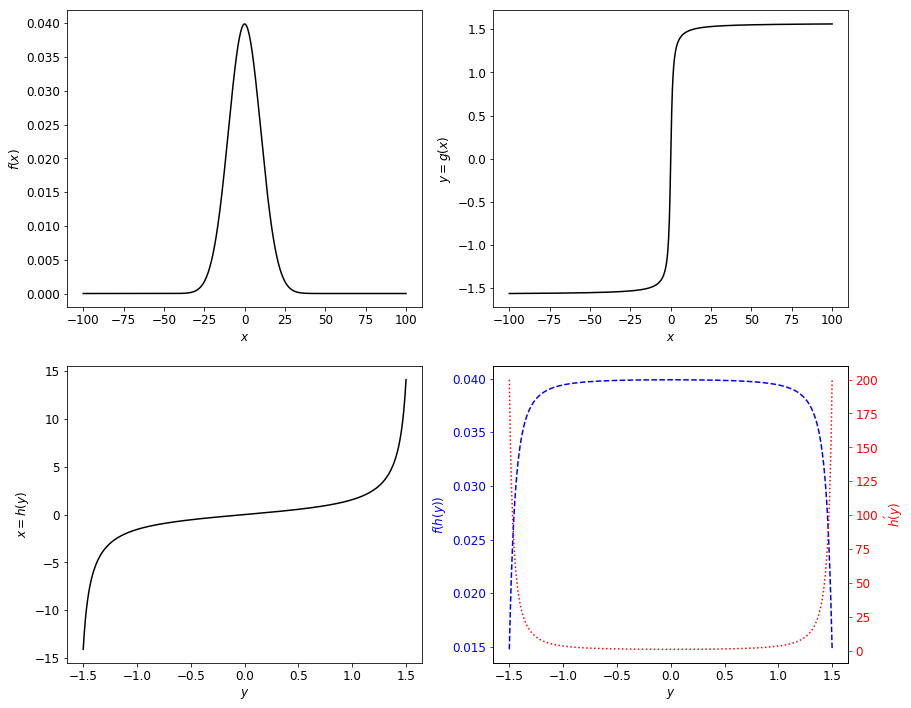

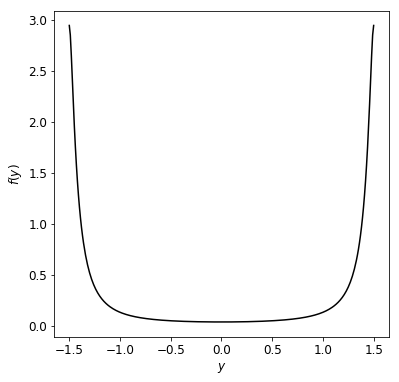

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

'''
demonstration of the propagation of distribution
'''
def func_g(x):
    '''
    y=g(x)
    '''
    y = np.arctan(x) 
    return y

def func_f_x(x, mu=0.,sig=10.):
    '''
    probability density function f(x)
    '''
    f_x = 1./(np.sqrt(2*np.pi)*sig)*np.exp(-(x-mu)**2/(2*sig**2))
    return f_x

def func_h(y):
    '''
    h(y), inverse function of g(x)
    '''
    x = np.tan(y)
    return x

def derive_h(y):
    '''
    h'(y), derivative of x=h(y)
    '''
    h_prime = 1./np.cos(y)**2
    return h_prime

def func_f_y(y, mu=0.,sig=10.):
    '''
    propagate distribution fromx to y
    '''
    return func_f_x(func_h(y),mu=mu,sig=sig)*np.abs(derive_h(y))

x = np.arange(-100,100.1,0.1)
fig = plt.figure(figsize=[14,12])
ax = fig.add_subplot(221)
ax.plot(x,func_f_x(x),'k-')
ax.set_xlabel(r'$x$',fontsize=12)
ax.set_ylabel(r'$f(x)$',fontsize=12)

ax = fig.add_subplot(222)
ax.plot(x,func_g(x),'k-')
ax.set_xlabel(r'$x$',fontsize=12)
ax.set_ylabel(r'$y=g(x)$',fontsize=12)

y = np.arange(-1.5,1.51,0.01)
ax = fig.add_subplot(223)
ax.plot(y,func_h(y),'k-')
ax.set_xlabel(r'$y$',fontsize=12)
ax.set_ylabel(r'$x=h(y)$',fontsize=12)

ax = fig.add_subplot(224)

ax2 = ax.twinx()
ax.plot(y,func_f_x(func_h(y)),'b--')
ax2.plot(y,np.abs(derive_h(y)),'r:')
ax.set_xlabel(r'$y$',fontsize=12)
ax.set_ylabel(r'$f(h(y))$',fontsize=12,color='b')
ax.tick_params('y',colors='b')
ax2.set_ylabel(r'$h\'(y)$',fontsize=12,color='r')
ax2.tick_params('y',colors='r')
fig.show()
fig.savefig('propagatedist_1.pdf',bbox_inches='tight')

fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
ax.plot(y,func_f_y(y),'k-')
ax.set_xlabel(r'$y$',fontsize=12)
ax.set_ylabel(r'$f(y)$',fontsize=12)
fig.show()
fig.savefig('propagatedist_2.pdf',bbox_inches='tight')

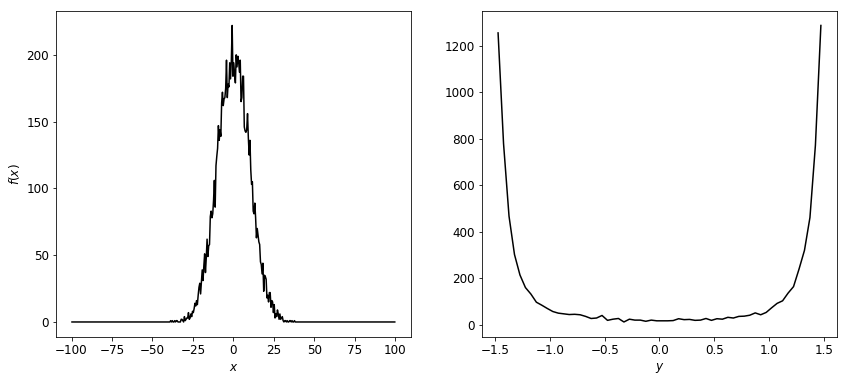

In [2]:
'''
Double-check whether the above figures are correct
'''
x = np.random.normal(0.,10.,size=10000)
y = func_g(x)

xgrid = np.arange(-100,100.5,0.5)
xcenter = (xgrid[1:]+xgrid[:-1])/2.
hx,xedge = np.histogram(x,bins=xgrid)

ygrid = np.arange(-1.5,1.55,0.05)
ycenter = (ygrid[1:]+ygrid[:-1])/2.
hy,xedge = np.histogram(y,bins=ygrid)

fig = plt.figure(figsize=[14,6])
ax = fig.add_subplot(121)
ax.plot(xcenter,hx,'k-')
ax.set_xlabel(r'$x$',fontsize=12)
ax.set_ylabel(r'$f(x)$',fontsize=12)

ax = fig.add_subplot(122)
ax.plot(ycenter,hy,'k-')
ax.set_xlabel(r'$y$',fontsize=12)
fig.show()
#fig.savefig('propagatedist_2.pdf',bbox_inches='tight')

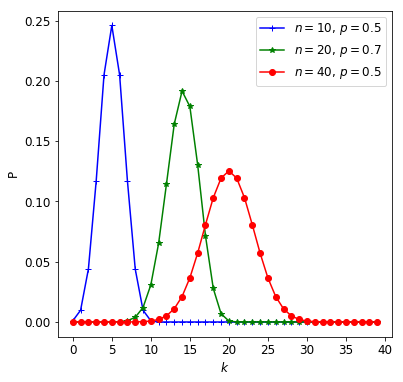

In [3]:
'''
Usually used distribution
Binomial 
Poisson
Exponential
Normal
Chi-square
'''
import scipy.stats as stats
#binomial
n1 = 10
p1 = 0.5
b1 = stats.binom(n1,p1)
n2 = 20
p2 = 0.7
b2 = stats.binom(n2,p2)
n3 = 40
p3 = 0.5
b3 = stats.binom(n3,p3)

x = np.arange(0, 40, 1)
fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
e1, = ax.plot(x, b1.pmf(x),'b-+')
e2, = ax.plot(x, b2.pmf(x),'g-*')
e3, = ax.plot(x, b3.pmf(x),'r-o')
plt.legend([e1,e2,e3],[r'$n=10$, $p=0.5$',r'$n=20$, $p=0.7$',r'$n=40$, $p=0.5$'],fontsize=12)
ax.set_xlabel(r'$k$',fontsize=12)
ax.set_ylabel(r'P',fontsize=12)
fig.show()
fig.savefig('binom.pdf',bbox_inches='tight')

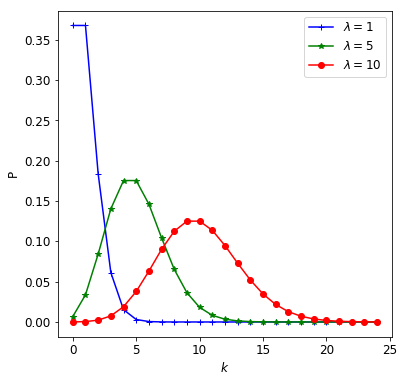

In [4]:
import scipy.stats as stats
#Poisson 
lambda1 = 1
lambda2 = 5
lambda3 = 10

x = np.arange(0, 25, 1)
fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
e1, = ax.plot(x, stats.poisson(lambda1).pmf(x),'b-+')
e2, = ax.plot(x, stats.poisson(lambda2).pmf(x),'g-*')
e3, = ax.plot(x, stats.poisson(lambda3).pmf(x),'r-o')
plt.legend([e1,e2,e3],[r'$\lambda=1$',r'$\lambda=5$',r'$\lambda=10$'],fontsize=12)
ax.set_xlabel(r'$k$',fontsize=12)
ax.set_ylabel(r'P',fontsize=12)
fig.show()
fig.savefig('poisson.pdf',bbox_inches='tight')

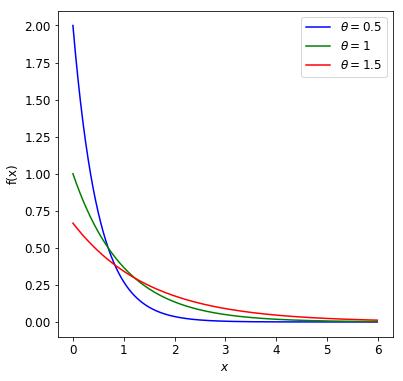

In [5]:
#exponential
import scipy.stats as stats
lambda1 = 0.5
lambda2 = 1
lambda3 = 1.5

x = np.arange(0, 6, 0.01)
fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
e1, = ax.plot(x, stats.expon.pdf(x,scale=lambda1),'b-')
e2, = ax.plot(x, stats.expon.pdf(x,scale=lambda2),'g-')
e3, = ax.plot(x, stats.expon.pdf(x,scale=lambda3),'r-')
plt.legend([e1,e2,e3],[r'$\theta=0.5$',r'$\theta=1$',r'$\theta=1.5$'],fontsize=12)
ax.set_xlabel(r'$x$',fontsize=12)
ax.set_ylabel(r'f(x)',fontsize=12)
fig.show()
fig.savefig('expdist.pdf',bbox_inches='tight')

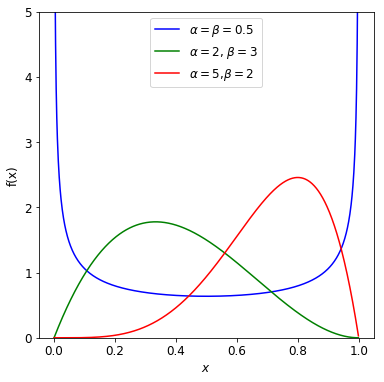

In [6]:
#Beta distribution
import scipy.stats as stats
a1 = 0.5
b1 = 0.5
a2 = 2.
b2 = 3.
a3 = 5.
b3 = 2.

x = np.arange(0, 1, 0.001)
fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
e1, = ax.plot(x, stats.beta.pdf(x,a1,b1),'b-')
e2, = ax.plot(x, stats.beta.pdf(x,a2,b2),'g-')
e3, = ax.plot(x, stats.beta.pdf(x,a3,b3),'r-')
plt.legend([e1,e2,e3],[r'$\alpha=\beta=0.5$',r'$\alpha=2$, $\beta=3$',r'$\alpha=5$,$\beta=2$'],fontsize=12)
ax.set_xlabel(r'$x$',fontsize=12)
ax.set_ylabel(r'f(x)',fontsize=12)
ax.set_ylim([0,5])
fig.show()
fig.savefig('betadist.pdf',bbox_inches='tight')

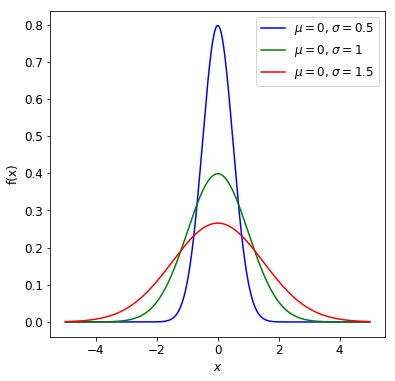

In [7]:
#Normal
import scipy.stats as stats

sig1 = 0.5
sig2 = 1
sig3 = 1.5

x = np.arange(-5, 5, 0.01)
fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
e1, = ax.plot(x, stats.norm.pdf(x,scale=sig1),'b-')
e2, = ax.plot(x, stats.norm.pdf(x,scale=sig2),'g-')
e3, = ax.plot(x, stats.norm.pdf(x,scale=sig3),'r-')
plt.legend([e1,e2,e3],[r'$\mu=0$, $\sigma=0.5$',r'$\mu=0$, $\sigma=1$',r'$\mu=0$, $\sigma=1.5$'],fontsize=12)
ax.set_xlabel(r'$x$',fontsize=12)
ax.set_ylabel(r'f(x)',fontsize=12)
fig.show()
fig.savefig('normdist.pdf',bbox_inches='tight')

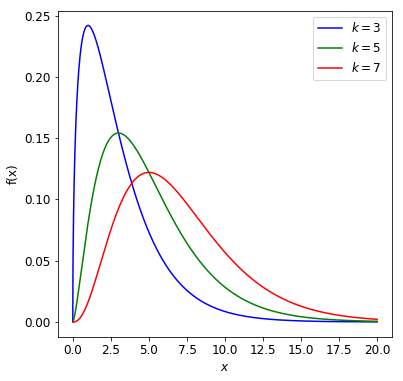

In [8]:
#Chi-square
import scipy.stats as stats

k1 = 3
k2 = 5
k3 = 7

x = np.arange(0, 20, 0.01)
fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
e1, = ax.plot(x, stats.chi2.pdf(x,k1),'b-')
e2, = ax.plot(x, stats.chi2.pdf(x,k2),'g-')
e3, = ax.plot(x, stats.chi2.pdf(x,k3),'r-')
plt.legend([e1,e2,e3],[r'$k=3$',r'$k=5$',r'$k=7$'],fontsize=12)
ax.set_xlabel(r'$x$',fontsize=12)
ax.set_ylabel(r'f(x)',fontsize=12)
fig.show()
fig.savefig('chi2dist.pdf',bbox_inches='tight')

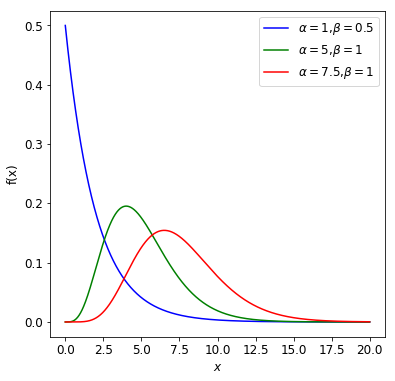

In [9]:
#Gamma
import scipy.stats as stats
import scipy.special as special

a1 = 1.
b1 = 0.5

a2 = 5.
b2 = 1.

a3 = 7.5
b3 = 1.

def Gamma_pdf(x,a,b):
    if x.any()<0 or a<=0 or b<=0:
        return np.NaN
    else:
        return b**a/special.gamma(a)*x**(a-1.)*np.exp(-b*x)
       # return np.exp(np.log(b)*a-special.gammaln(a)+(a-1.)*np.log(x)-b*x)
    
x = np.arange(0.0001, 20, 0.01)
fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
e1, = ax.plot(x, Gamma_pdf(x,a1,b1),'b-')
e2, = ax.plot(x, Gamma_pdf(x,a2,b2),'g-')
e3, = ax.plot(x, Gamma_pdf(x,a3,b3),'r-')
plt.legend([e1,e2,e3],[r'$\alpha=1$,$\beta=0.5$',\
                       r'$\alpha=5$,$\beta=1$',r'$\alpha=7.5$,$\beta=1$'],fontsize=12)
ax.set_xlabel(r'$x$',fontsize=12)
ax.set_ylabel(r'f(x)',fontsize=12)
fig.show()
fig.savefig('gammadist.pdf',bbox_inches='tight')

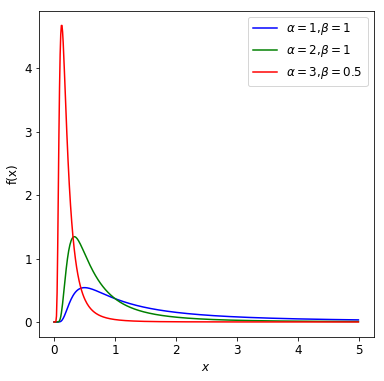

In [10]:
#Inverse-Gamma
import scipy.stats as stats
import scipy.special as special

a1 = 1.
b1 = 1.

a2 = 2.
b2 = 1.

a3 = 3.
b3 = 0.5

def InvGamma_pdf(x,a,b):
    if x.any()<0 or a<=0 or b<=0:
        return np.NaN
    else:
        return np.exp(np.log(b)*a-special.gammaln(a)-(a+1.)*np.log(x)-b/x)
    
x = np.arange(0.0001, 5, 0.01)
fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
e1, = ax.plot(x, InvGamma_pdf(x,a1,b1),'b-')
e2, = ax.plot(x, InvGamma_pdf(x,a2,b2),'g-')
e3, = ax.plot(x, InvGamma_pdf(x,a3,b3),'r-')
plt.legend([e1,e2,e3],[r'$\alpha=1$,$\beta=1$',r'$\alpha=2$,$\beta=1$',r'$\alpha=3$,$\beta=0.5$'],fontsize=12)
ax.set_xlabel(r'$x$',fontsize=12)
ax.set_ylabel(r'f(x)',fontsize=12)
fig.show()
fig.savefig('invgammadist.pdf',bbox_inches='tight')

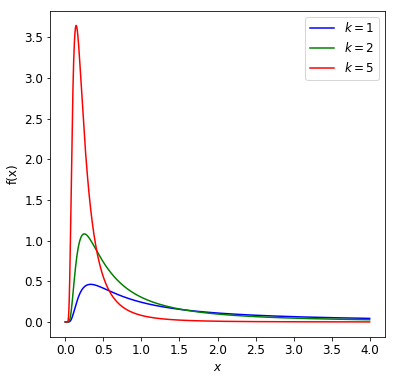

In [11]:
#Inverse-Chi-square
k1 = 1.
k2 = 2.
k3 = 5.

x = np.arange(0.0001, 4, 0.001)
fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
e1, = ax.plot(x, InvGamma_pdf(x,k1/2.,0.5),'b-')
e2, = ax.plot(x, InvGamma_pdf(x,k2/2.,0.5),'g-')
e3, = ax.plot(x, InvGamma_pdf(x,k3/2.,0.5),'r-')
plt.legend([e1,e2,e3],[r'$k=1$',r'$k=2$',r'$k=5$'],fontsize=12)
ax.set_xlabel(r'$x$',fontsize=12)
ax.set_ylabel(r'f(x)',fontsize=12)
fig.show()
fig.savefig('invchi2dist.pdf',bbox_inches='tight')

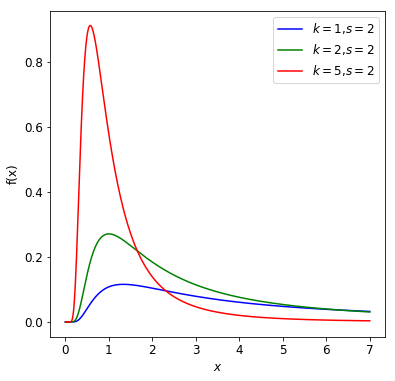

In [12]:
#Scaled Inverse-Chi-square
k1 = 1.
k2 = 2.
k3 = 5.
s = 2.0

x = np.arange(0.0001, 7, 0.001)
fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
e1, = ax.plot(x, InvGamma_pdf(x,k1/2.,k1/2.*s**2),'b-')
e2, = ax.plot(x, InvGamma_pdf(x,k2/2.,k1/2.*s**2),'g-')
e3, = ax.plot(x, InvGamma_pdf(x,k3/2.,k1/2.*s**2),'r-')
plt.legend([e1,e2,e3],[r'$k=1$,$s=2$',r'$k=2$,$s=2$',r'$k=5$,$s=2$'],fontsize=12)
ax.set_xlabel(r'$x$',fontsize=12)
ax.set_ylabel(r'f(x)',fontsize=12)
fig.show()
fig.savefig('invscalechi2dist.pdf',bbox_inches='tight')